<a href="https://www.kaggle.com/code/muhammadmeftahmafazy/extraction-audio?scriptVersionId=133116529" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import Libraries

In [1]:
# feature extractoring and preprocessing data
import librosa
import matplotlib.image as mpimg
import librosa, librosa.display, os, csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv

#Pytorch
import torch

from imblearn.pipeline import Pipeline

import joblib

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#Other
from IPython.display import Audio
from tqdm import tqdm

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
!ls ../input/coughvid-19/dataset/archive_wav/archive_wav

00039425-7f3a-42aa-ac13-834aaa2b6b92.wav
0009eb28-d8be-4dc1-92bb-907e53bc5c7a.wav
001328dc-ea5d-4847-9ccf-c5aa2a3f2d0f.wav
0028b68c-aca4-4f4f-bb1d-cb4ed5bbd952.wav
00291cce-36a0-4a29-9e2d-c1d96ca17242.wav
002d28bc-7806-4dfb-9c9b-afa8cb623cac.wav
0037f67c-0d6f-42e6-ab94-66499d4d2bf4.wav
003e1bf6-2ecf-4a00-9198-29db34e8d7ac.wav
0044964d-f7e9-43e3-831f-ae3e6374a9a4.wav
0044cb7b-448c-44e5-8302-ad8bd106fe3e.wav
004c24d8-e8cd-4755-86f6-5a1d8c7920c7.wav
005887c9-4bb1-4f13-86b2-1c7b3cee0881.wav
005b8518-03ba-4bf5-86d2-005541442357.wav
005bca13-18d1-4514-a086-cc8c3fafeeb2.wav
00745765-96ed-4e13-8ca7-7f6b793af78d.wav
00753bb4-cffb-472b-b391-09337558a678.wav
007be9cd-6c5d-467f-a89c-e670fae075b4.wav
00802ac6-0e3b-4bba-bcdc-014f1fde7432.wav
008ba489-31ad-44d8-856b-fcf72369dc46.wav
009aa393-32ab-423f-8e6a-63d8d4d1476b.wav
009b1e22-f451-40ae-9cbf-9f1ff5dec022.wav
00a31212-7c64-4649-b78b-4c7d9ce3156e.wav
00bf9f83-2e8f-47cf-a4f2-97f2beceebc1.wav
00c24aac-b6c8-4065-a999-079cb48fcf86.wav
00c2b443-4746-43

In [3]:
dataset = "../input/coughvid-19/dataset/metadata_wav.csv"
train_csv = pd.read_csv(dataset, index_col=0)
train_csv

,file,status
1,00039425-7f3a-42aa-ac13-834aaa2b6b92.wav,healthy
3,0009eb28-d8be-4dc1-92bb-907e53bc5c7a.wav,healthy
5,001328dc-ea5d-4847-9ccf-c5aa2a3f2d0f.wav,healthy
10,0028b68c-aca4-4f4f-bb1d-cb4ed5bbd952.wav,healthy
11,00291cce-36a0-4a29-9e2d-c1d96ca17242.wav,healthy
...,...,...
27292,fd849b72-f4bf-4852-9bc2-fd9becc9571e.wav,COVID-19
27300,fd8d6e46-75de-42b3-a7ef-30d5294b915d.wav,COVID-19
27315,fdbabb79-c296-4b93-9e02-06b290916fe7.wav,COVID-19
27503,ff8363d2-016d-4738-9499-4c62480886fb.wav,COVID-19


## Grafik Audio

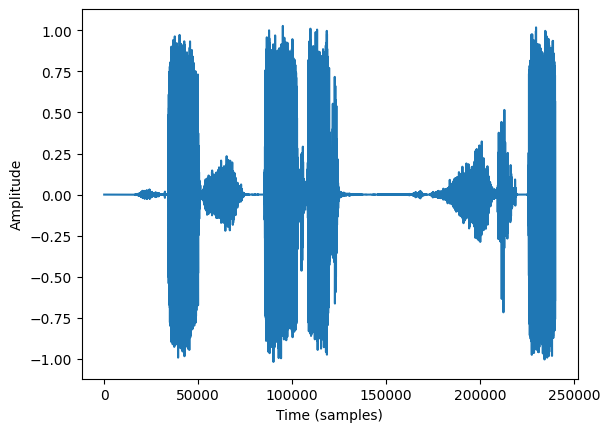

In [11]:
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

audio_path = '/kaggle/input/coughvid-19/dataset/archive_wav/archive_wav/ffe0658f-bade-4654-ad79-40a468aabb03.wav'
y, sr = librosa.load(audio_path, sr=None, duration=5)
plt.plot(y)
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.savefig('/kaggle/working/covid-19.png', bbox_inches='tight')

# Converting Audio into Spectrogram

In [4]:
# cmap = plt.get_cmap('inferno')
# tot_rows = train_csv.shape[0]
# print ('total_rows',tot_rows, 'columns: ', train_csv.shape[1])
# for i in range(0,1): #Thay range(1) = range(tot_rows)
#     source = train_csv.iloc[6]["file"]
#     filename = '../input/coughvid-19/dataset/archive_wav/archive_wav/'+source
#     y,sr = librosa.load(filename, mono=True, duration=5)
#     plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap='magma', sides='default', mode='default', scale='dB');
# #     plt.axis('off');
#     plt.savefig(f'./{source[:-3].replace(".", "")}.png')
#     print (source[:-4]) #Remove the last 4 characters ".wav"
# #     plt.clf() 

total_rows 1926 columns:  2
0037f67c-0d6f-42e6-ab94-66499d4d2bf4


<Figure size 640x480 with 0 Axes>

# Extraction Feature

## For this condition only 6 extraction feature, maybe will changed for the future

* Chroma Short Time Fourier Transform (STFT)
* Spectral Centroid
* Spectral Bandwidth
* Spectral Rolloff
* Zero Crossing Rate
* Mel Frequency Cepstral Coefficient (MFCC)
* Chroma Constant-Q Transform
* Chroma Energy  Normalized Statistics
* Chroma Variable-Q Transform
* Mel Spectrogram
* Spectral Contrast
* Spectral Flatness
* Poly Features
* Tonnetz

In [ ]:
# # Making Header
# header = 'filename chroma_stft chroma_cqt chroma_cens chroma_vqt mel_spectro rmse spectral_centroid spectral_bandwidth spec_cons spec_flat rolloff poly_f ton zero_crossing_rate'
# for i in range(1, 11):
#     header += f' mfcc{i}'
# header += ' label'
# header = header.split()
# print(header)

In [ ]:
# #Proses Ekstraksi Fitur
# file = open('data_new_extended.csv', 'w')
# intervals = [1.0, 1.25, 1.5, 1.75]
# with file:
#     writer = csv.writer(file)
#     writer.writerow(header)
# # data_new_extended = pd.read_csv('./data_new_extended.csv')
# #print ('data_new_extended\n',data_new_extended)
# for i in tqdm(range(train_csv.shape[0])):
#         source = train_csv.iloc[i]["file"]
# #         print ('source',source)
#         file_name = '../input/coughvid-19/dataset/archive_wav/archive_wav/'+source
#         label =  train_csv.iloc[i]["status"]
# #         print ('\status', label)
#         y,sr = librosa.load(file_name, mono=True, duration=5)
#         chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
#         chroma_cqt = librosa.feature.chroma_cqt(y=y, sr=sr)
#         chroma_cens = librosa.feature.chroma_cens(y=y, sr=sr)
#         chroma_vqt = librosa.feature.chroma_vqt(y=y, sr=sr, intervals=intervals)
#         mel_spectro = librosa.feature.melspectrogram(y=y, sr=sr)
#         rmse = librosa.feature.rms(y=y)
#         spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr,hop_length=1024)
#         spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr,hop_length=1024)
#         spec_cons = librosa.feature.spectral_contrast(y=y, sr=sr,hop_length=1024)
#         spec_flat = librosa.feature.spectral_flatness(y=y, hop_length=1024)
#         rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr,hop_length=1024)
#         poly_f = librosa.feature.poly_features(y=y, sr=sr)
#         ton = librosa.feature.tonnetz(y=y, sr=sr)
#         zcr = librosa.feature.zero_crossing_rate(y)
#         mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=10)
#         #print ('mfcc',mfcc)
        
# # mendapatkan nilai rata rata, perlu dimasukkan ke var to_append {np.mean(chroma_cqt)} {np.mean(chroma_vqt)} {np.mean(chroma_cens)} {np.mean(mel_spectro)}
#         to_append = f'{np.mean(chroma_stft)} {np.mean(chroma_cqt)} {np.mean(chroma_cens)} {np.mean(chroma_vqt)} {np.mean(mel_spectro)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(spec_cons)} {np.mean(spec_flat)} {np.mean(rolloff)} {np.mean(poly_f)} {np.mean(ton)} {np.mean(zcr)}'    
#         #np.mean nilai rata-rata
#         librosa.display.specshow(mfcc, x_axis='time') #Show MFCC
#         plt.title('MFCC')
#         #plt.show()
        
#         for e in mfcc:
#             to_append += f' {np.mean(e)}'
#         to_append += f' {label}'
#         value = [str(source)]
#         value.extend(to_append.split())
#         file = open('./data_new_extended.csv', 'a')
#         with file:
#             writer = csv.writer(file)
#             writer.writerow(value)

# Filling data into .csv

In [ ]:
# # Downloading the received file
# from IPython.display import HTML
# import pandas as pd
# import numpy as np

# def create_download_link(title = "Download CSV file", filename = "./data_new_extended.csv"):  
#     html = '<a href={filename}>{title}</a>'
#     html = html.format(title=title,filename=filename)
#     return HTML(html)

# # create a link to download the dataframe which was saved with .to_csv method
# create_download_link(filename='./data_new_extended.csv')